In [1]:
#Importing libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
#Importing algorithms and metrices
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
train = pd.read_csv('train_model.csv')

In [4]:
train.shape

(6420, 3)

In [5]:
train = train.dropna()

In [6]:
train = train.replace({'label': {'real':1, 'fake':0}})
y = train['label']

In [7]:
#Preprocessing our data
ps = PorterStemmer()
corpus = []
for i in range(len(train)):
    review = re.sub('[^a-zA-Z]',' ',train['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['cdc current report death gener discrep death count differ sourc small explic death toll stand roughli peopl today',
 'state report death small rise last tuesday southern state report death http co yasgrtt ux',
 'polit correct woman almost use pandem excus reus plastic bag http co thf gunfp coronaviru nashvil',
 'indiafightscorona covid test laboratori india th august test done profbhargava dg icmrdelhi staysaf indiawillwin http co yh zxknnhz',
 'popul state gener larg case count look new case per million today smaller state show case per million california texa al ar id ks ky la ms nv sc http co pyw cwra',
 'covid act found averag person illinoi covid infect peopl data show infect growth rate declin time factor stay home order restrict put place http co hhigdd fe',
 'test posit covid symptom stay home away peopl learn cdc recommend around other covid infect http co z kkxpqkyb http co pami rxaf',
 'obama call trump coronaviru respons chaotic disast http co dedqzehasb',
 'clearli obama

In [8]:
cv = CountVectorizer(max_features=5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
X_Train,X_test,y_Train,y_Test = train_test_split(X,y,test_size = 0.33, random_state=0)

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Naive Bayes's algorithm MultinomialNB

In [11]:
classifier = MultinomialNB()

In [12]:
classifier.fit(X_Train,y_Train)

MultinomialNB()

In [13]:
predict = classifier.predict(X_test)
len(predict)

2119

0.8862671071260029
[[969  49]
 [192 909]]
Confusion matrix, without normalization


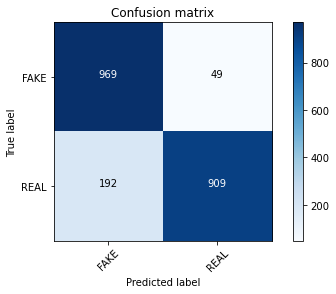

In [14]:
score = metrics.accuracy_score(y_Test,predict)
print(score)
cm=metrics.confusion_matrix(y_Test,predict)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Linear Models's Passive Aggressive Classifier Algorithm

In [15]:
classifier = PassiveAggressiveClassifier(max_iter=50)

In [16]:
classifier.fit(X_Train,y_Train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
pred = classifier.predict(X_test)
len(pred)

2119

0.9202453987730062
[[ 944   74]
 [  95 1006]]
Confusion matrix, without normalization


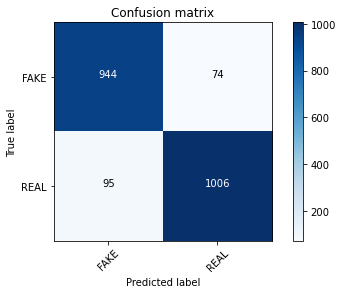

In [18]:
score = metrics.accuracy_score(y_Test,pred)
print(score)
cm = metrics.confusion_matrix(y_Test,pred)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])